In [47]:
import pandas as pd 
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import sklearn.metrics as metrics
from sklearn import preprocessing
import math
import os.path
from os import path
from pylab import rcParams
from random import randrange
from pandas import Series
from matplotlib import pyplot
import pickle
import os
import joblib
from sklearn.linear_model import LinearRegression


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
data = pd.read_csv("/content/drive/MyDrive/Dữ liệu Lịch sử VN Index.csv")
data

,Date,Close,Open,High,Low,Vol,% Change
0,2009-01-02,313.34,312.49,313.34,312.18,5.63K,-0.72%
1,2009-01-05,311.91,308.77,311.91,308.25,7.92K,-0.46%
2,2009-01-06,314.04,312.91,315.02,312.88,12.97K,0.68%
3,2009-01-07,319.58,320.40,322.59,319.29,14.75K,1.76%
4,2009-01-08,314.15,315.92,318.79,313.04,14.94K,-1.70%
...,...,...,...,...,...,...,...
3476,2022-12-06,1048.69,1093.67,1093.67,1048.69,1.48M,-4.11%
3477,2022-12-07,1041.02,1048.69,1059.79,1034.92,920.94K,-0.73%
3478,2022-12-08,1050.53,1041.02,1078.09,1041.02,916.99K,0.91%
3479,2022-12-09,1051.81,1050.53,1061.21,1041.39,788.20K,0.12%


In [37]:
data.Date = pd.to_datetime(data.Date, dayfirst = False)

data.set_index("Date", inplace = True)

In [38]:
data = data[['Close']] 
data

,Close
Date,
2009-01-02,313.34
2009-01-05,311.91
2009-01-06,314.04
2009-01-07,319.58
2009-01-08,314.15
...,...
2022-12-06,1048.69
2022-12-07,1041.02
2022-12-08,1050.53


In [39]:
data = data.reset_index()
x = np.array(data.index)
y = data['Close']

In [40]:
x = x*x

In [41]:
lm = LinearRegression()
lm.fit(x[:,np.newaxis], y)

LinearRegression()

In [43]:
y_pred = lm.predict(x[:,np.newaxis])
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df

,Actual,Predicted
0,313.34,412.930809
1,311.91,412.930888
2,314.04,412.931125
3,319.58,412.931519
4,314.15,412.932071
...,...,...
3476,1048.69,1366.151162
3477,1041.02,1366.699699
3478,1050.53,1367.248394
3479,1051.81,1367.797247


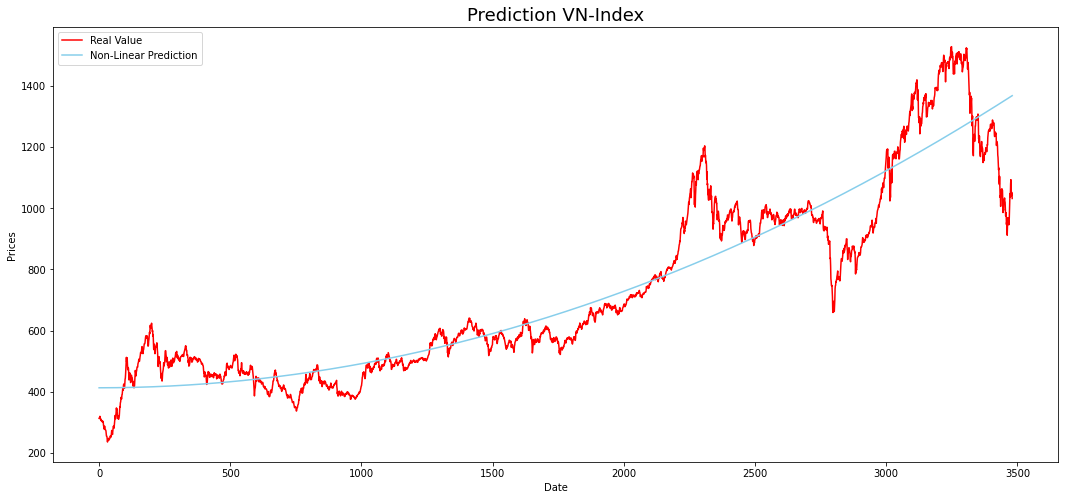

In [45]:
plt.figure(figsize=(18,8))
plt.plot(y, color="red", label=f"Real Value")
plt.plot(y_pred, color="skyblue", label = 'Non-Linear Prediction')
plt.title('Prediction VN-Index', fontsize=18)
plt.xlabel('Date')
plt.ylabel("Prices")
plt.legend()

In [48]:
print("TẬP TEST                           TẬP TRAIN")
print("Nonlinear Regression")
print("MSE  : " + str(mean_squared_error(data['Close'], y_pred))                
+"  ||  "  + str(mean_squared_error(data['Close'], y_pred)))
print("MAE  : " + str(mean_absolute_error(data['Close'], y_pred))               
+" ||  " + str(mean_absolute_error(data['Close'], y_pred)))
print("MAPE : " + str(mean_absolute_percentage_error(data['Close'], y_pred)*100)
+"  ||  "  + str(mean_absolute_percentage_error(data['Close'], y_pred)*100))
print("R2   : " + str(round(metrics.r2_score(data['Close'], y_pred), 15))
+"  ||  "  + str(round(metrics.r2_score(data['Close'], y_pred), 15)))

TẬP TEST                           TẬP TRAIN
Nonlinear Regression
MSE  : 12490.834350030853  ||  12490.834350030853
MAE  : 80.1619476619733 ||  80.1619476619733
MAPE : 11.28187207403733  ||  11.28187207403733
R2   : 0.866664619420599  ||  0.866664619420599
